# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

El proposito del proyecto será buscar una relación entre las características de un vehículo y su precio. Esto se conseguirá a traves del archivo de datos que se proporciona. Se mostrarán distintos graficos, según se amerite, para una representación gráfica de los resultados del analisis.


## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame
try:
    data = pd.read_csv("vehicles_us.csv")
except:
    data = pd.read_csv("/datasets/vehicles_us.csv")

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [3]:
# imprime la información general/resumida sobre el DataFrame
data.info()
print()
print(f"Número de filas del conjunto de datos: ",data.shape[0])
print(f"Número de columnas del conjunto de datos: ",data.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB

Número de filas del conjunto de datos:  51525
Número de columnas del conjunto de datos:  13


In [4]:
# imprimir una muestra de datos
data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Se puede observar que hay valores ausentes en las columnas `model_year`,`cylinders`, `odometer`, `paint_color` y `is_4wd`. Se tendrá que investigar si los datos ausentes de estas columnas tienen un impacto considerable al resultado del analisis.
En la columna `model_year` los datos son de tipo double, se hará el cambio a tipo int, debido a que los modelos de años no tienen fracciones. Lo mismo ocurre en la columna `cylinder`.
La columna `is_4wd` es binaria, esto quiere decir que solo puede tener dos opciones, si tiene tracción a las 4 ruedas o no. Se hará la modificación para los valores True si tiene tracción a las 4 ruedas o False si no cuenta con tracción en las 4 ruedas.
En la columna `date_posted` los datos son de tipo object, requeriremos cambiarlos a formato datetime.


In [5]:
print(f"Porcentaje de valores ausente en columnas:\n", (data.isna().sum())/len(data)*100)

Porcentaje de valores ausente en columnas:
 price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64


Los porcentajes de valores ausente son altos. Se analizarán los datos para encontrar patrones que nos sean de utilizadad para rellenar estos valores.

### Conclusiones y siguientes pasos
A continuación se buscarán patrones en los datos para llenar los valores ausentes de las columnas `model_year`, `cylinders`, `odometer` e `is_4wd` las cuales se consideran que pueden impactar en el valor de un vehiculo. En cambio `paint_color` no es relevante para la valuación de un vehiculo, a menos que se especifique si es pintura original, pero no es el caso.

## Tratar los valores ausentes (si hay)

In [6]:
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


No se encuentra relaciones obvias en las columnas `model_year` y `odometer`. Por consiguiente, se eliminarán las filas de esos datos, debido a que si tratamos de acompletarlas sacando promedios o medianas basándonos en otra característica; se pudiera causar un sesgo estadístico en el resultado.

In [7]:
data.pivot_table(index = "model", values="model_year", aggfunc=("mean","median", "max", "min", "std"))

,max,mean,median,min,std
model,,,,,
acura tl,2014.0,2007.517857,2007.0,1999.0,3.337468
bmw x5,2018.0,2008.991870,2010.0,2001.0,3.878767
buick enclave,2018.0,2012.194553,2012.0,2008.0,2.399766
cadillac escalade,2019.0,2008.508475,2009.0,1908.0,7.340533
chevrolet camaro,2019.0,2008.397959,2013.0,1967.0,11.578479
...,...,...,...,...,...
toyota sienna,2019.0,2008.584416,2008.0,1998.0,4.719771
toyota tacoma,2019.0,2009.331599,2010.0,1989.0,5.780765
toyota tundra,2018.0,2009.350352,2009.0,2000.0,5.052682


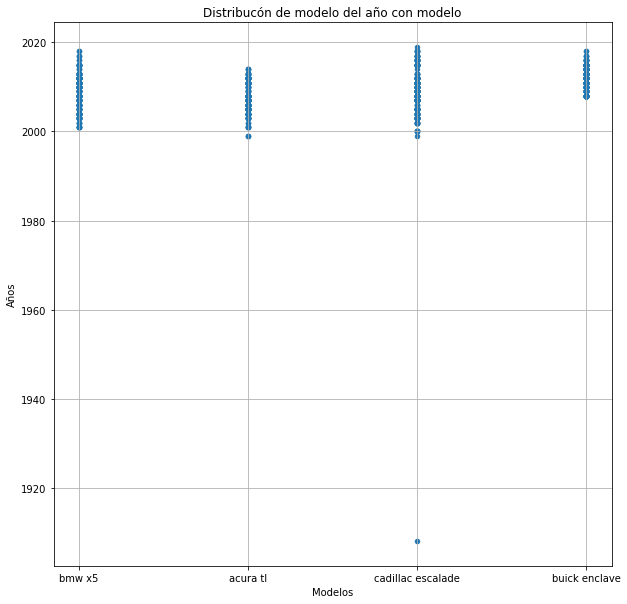

In [8]:
data.query('model == ["bmw x5", "acura tl", "buick enclave", "cadillac escalade"]').plot(kind="scatter", x="model", y="model_year", grid= True, figsize=(10,10))
plt.title("Distribucón de modelo del año con modelo")
plt.ylabel("Años")
plt.xlabel("Modelos")
plt.show()

Se utilizaran valores medios para acompletar la columna `model_year` debido a que hay valores atípicos.

In [9]:
def model_year_app(car): # Función para asignar año a la columna model_year
    model = car["model"]
    return data[data["model"]==model]["model_year"].median()

In [10]:
print(data.loc[2, "model"]) #Se prueba la funcón creada
print(model_year_app(data.iloc[2]))
print()
print(data.loc[3, "model"])
print(model_year_app(data.iloc[3]))
print()
print(data.loc[4, "model"])
print(model_year_app(data.iloc[4]))
print()

hyundai sonata
2012.0

ford f-150
2011.0

chrysler 200
2014.0



In [11]:
data["model_year"] = data[["model_year", "model"]].where(data["model_year"].isna() == False, model_year_app)#Aplicación de la función creada

In [12]:
data.head() #muestra de los datos

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [13]:
data["model_year"].isna().sum() #Comprobar la columna model year

0

Se acompleto la columna `model_year` con las medianas de cada modelo.

In [14]:
data.pivot_table(index = "condition", values="odometer", aggfunc=("mean","median", "max", "min", "std"))

,max,mean,median,min,std
condition,,,,,
excellent,980000.0,106687.682258,104230.0,0.0,58121.834357
fair,500000.0,183062.233577,181613.0,0.0,68144.412266
good,990000.0,129919.930980,129000.0,0.0,66725.844479
like new,990000.0,79426.738166,72982.5,0.0,56967.637938
new,315000.0,43476.056000,8002.0,5.0,67269.684251
salvage,482000.0,140919.989796,142673.5,0.0,91356.850318


Se puede observar muchos valores en 0 de millaje en todas las categorías de condition. Debido a que hay mucha dispersación en los datos usaremos la mediana para sustituir los valores faltantes.

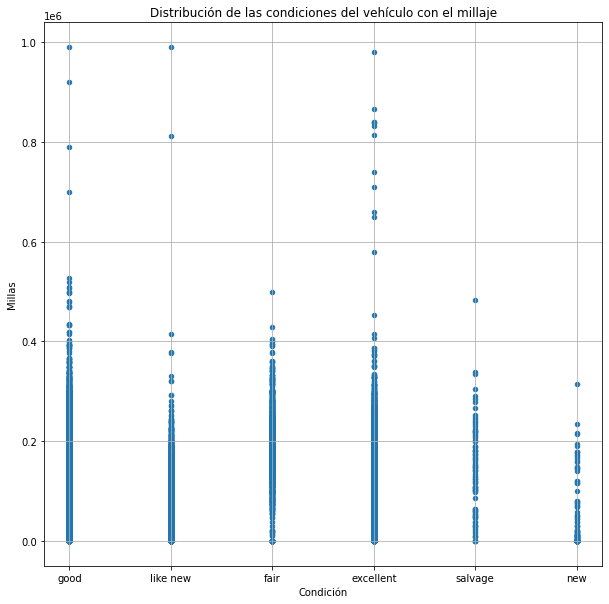

In [15]:
data.plot(kind="scatter", x="condition", y="odometer", grid= True, figsize=(10,10))
plt.title("Distribución de las condiciones del vehículo con el millaje")
plt.ylabel("Millas")
plt.xlabel("Condición")
plt.show()

In [16]:
odo_car = data.groupby("condition")["odometer"].median() # Se crean un diccionario de condición
index_na = data.query('odometer.isna()').index #Indices de con valores NAN en odometer
values_odo = odo_car[data.loc[index_na, "condition"]].values #Se crea una lista de valores 
data.loc[index_na, "odometer"] = values_odo #Se asignana valores al df

In [17]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [18]:
data["odometer"].isna().sum()#Se comprueba que no haya datos sin valor en odometer

0

In [19]:
data.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer            0
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

A continuación, complementaremos los datos de la columna `cylinders`. De igual manera se repararan los datos, debido a que 

In [20]:
data.query('model==["ford f-150"]')["cylinders"].describe()

count    2480.000000
mean        7.294355
std         1.010857
min         3.000000
25%         6.000000
50%         8.000000
75%         8.000000
max        10.000000
Name: cylinders, dtype: float64

In [21]:
data.query('model==["bmw x5"]')["cylinders"].describe()

count    251.000000
mean       6.406375
std        0.806349
min        6.000000
25%        6.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: cylinders, dtype: float64

Hay diferentes números de cilindros para cada modelo, pero los modelos de los vehículos solo manejan un determinado número de cilindros por modelo. Por lo tanto, se creara una función para corregir el cilindraje de los vehículos y para rellenar los datos vacíos.

In [22]:
def refill_cylinder(car):
    model = car["model"]
    return data.query('model == @model')["cylinders"].median()

In [23]:
cy_mode = data.groupby("model")["cylinders"].median() # Se crean un diccionario de condición
values_cy = cy_mode[data["model"]].values
data.loc[:,"cylinders"] = values_cy

In [24]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,8.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [25]:
data["cylinders"].isna().sum()

0

Para no perder los valores de la columna `paint_color` se rellenaron con la leyenda "unknown". Como se mencionó anteriormente, el color de un vehículo no impacta directamente al precio, a menos que se hable de pintura original.

In [26]:
data["paint_color"] = data["paint_color"].fillna("unknown")

In [27]:
data.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Se rellanan los valores ausentes de la columna `is_4wd`. La columna es una condición de si el vehículo cuenta con tracción en las 4 ruedas, representada con el valor 1; ó no cuenta con tracción en las 4 ruedas, representada con el valor 0. Se llenarán los valores ausentes con 0.

In [28]:
data["is_4wd"] = data["is_4wd"].fillna(0)

In [29]:
data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Se comprueba que ya no existen valores ausentes.

In [30]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,8.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Dataset final sin valores ausentes.

In [31]:
data.info()
print()
print(f"Número de filas del conjunto de datos: ",data.shape[0])
print(f"Número de columnas del conjunto de datos: ",data.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  object 
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB

Número de filas del conjunto de datos:  51525
Número de columnas del conjunto de datos:  13


Se procede a revisar los valores unicos en las columnas `model`,

In [32]:
data["model"].sort_values().unique()#Valores unicos en model

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

No se encuentra valores mal escritos, hay valores parecidos pero cambian algunas cosas entre los modelos. Si intentan agrupar se pudiera caer en un sesgo estadístico.

In [33]:
data["condition"].sort_values().unique()#Valores unicos en condition

array(['excellent', 'fair', 'good', 'like new', 'new', 'salvage'],
      dtype=object)

No se encuentran valores mal escritos en condition.

In [34]:
data["cylinders"].sort_values().unique()#Valores unicos en cylinders

array([4., 5., 6., 8.])

No se encuentran valores mal escritos en cylinders.

In [35]:
data["fuel"].sort_values().unique()#Valores unicos en fuel

array(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype=object)

No se encuentran valores mal escritos en fuel.

In [36]:
data["transmission"].sort_values().unique()#Valores unicos en transmission

array(['automatic', 'manual', 'other'], dtype=object)

No se encuentran valores mal escritos en transmission.

In [37]:
data["type"].sort_values().unique()#Valores unicos en type

array(['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon'],
      dtype=object)

No se encuentran valores mal escritos en type.

In [38]:
data["is_4wd"].sort_values().unique()#Valores unicos en type

array([0., 1.])

No se encuentran valores mal escritos en type.

## Corregir los tipos de datos

[Ya que los datos están más o menos completos ahora, corrige los tipos de datos si es necesario.]

In [39]:
convert = {"model_year": int, "cylinders": int, "odometer": int, "is_4wd": int}
data = data.astype(convert)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  int64 
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 5.1+ MB


Se convirtieron los tipos de valores de las columnas `model_year`, `cylinders`, `odometer` e `is_4wd` a tipo int, porque son valores enteros y visualmente se visualiza mejor.

In [40]:
data["date_posted"] = pd.to_datetime(data["date_posted"], format= "%Y-%m-%d")

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.1+ MB


Se comprueba que la columna `date_posted` ahora es de tipo datetime.

In [42]:
data.head() # Imprimir primeras 5 filas

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2011,ford f-150,good,8,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28


Dataset final, sin valores ausentes y el tipo de datos en el formato adecuado.

A continuanción se buscarán duplicados obvios en el dataset.

In [43]:
data.duplicated().sum()

0

No se encuentran duplicados obvios.

## Enriquecer datos

[Agrega factores adicionales a los datos para facilitar el análisis.]

In [44]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
data["weekday"] = pd.DatetimeIndex(data["date_posted"]).weekday
data["month"] = pd.DatetimeIndex(data["date_posted"]).month
data["year"] = pd.DatetimeIndex(data["date_posted"]).year

In [45]:
data.head() # Se comprueban las nuevas columnas

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018
1,25500,2011,ford f-150,good,8,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019


Se agregaron de manera exitosa las columnas `weekday`, `month` y `year`. Esto contribuirá en el analisis de los datos.

In [46]:
# Agrega los años del vehículo cuando el anuncio se colocó
data["car_year"] = data["year"] - data["model_year"]

In [47]:
data.head() # Se comprueba la nueva columna

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,car_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7
1,25500,2011,ford f-150,good,8,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2


La nueva columna `car_year` muestra la cantidad de años del vehículo.

In [48]:
data_zero = data.query('car_year == 0').index #Se buscan indices con 0 años
data_normal=data.query('car_year != 0').index #Se buscan indices con más de 0 años 
data.loc[data_normal, "mill_mean"] = data["odometer"] / data["car_year"] #Valores mayores de 0 años se aplica fórmulas de millaje por año
data.loc[data_zero, "mill_mean"] = data.loc[data_zero, "odometer"] #Valores iguales a 0 años se copia valor de odometer

In [49]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,car_year,mill_mean
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,good,8,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,11350.812500
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000


Se agrega la columna `mill_mean` el promedio del millaje por año del vehículo. Los carros que tienen 0 años, se le asigna el valor en odometer, debido a que no se puede dividir entre 0.

In [50]:
data["condition"].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [51]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
def numeric (column):
    if column == "new":
        return 5
    elif column == "like new":
        return 4
    elif column == "excellent":
        return 3
    elif column == "good":
        return 2
    elif column == "fair":
        return 1
    return 0

In [52]:
data["condition"] = data["condition"].apply(numeric) # Se aplica función para cambiar los valores de condición

In [53]:
data.head() 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,car_year,mill_mean
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,8,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,11350.812500
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000


Se aplica la función realizada para cambiar a valor númerico toda la columna de `condition`.

## Comprobar datos limpios

In [54]:
# imprime la información general/resumida sobre el DataFrame
data.info()
print()
print(f"Número de filas del conjunto de datos: ",data.shape[0])
print(f"Número de columnas del conjunto de datos: ",data.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  weekday       51525 non-null  int64         
 14  month         51525 non-null  int64         
 15  year          51525 non-null  int64 

In [55]:
# imprimir una muestra de datos
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,car_year,mill_mean
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,8,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,11350.812500
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.500000
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3,26404.000000
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.000000


Se imprime el dataset final, que será utilizado para el analisis. 

## Estudiar parámetros principales
Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

[Si te das cuenta que necesitas repetir los mismos trabajos varias veces, piensa qué instrumento de programación podría ser útil para evitar duplicar tu código.]

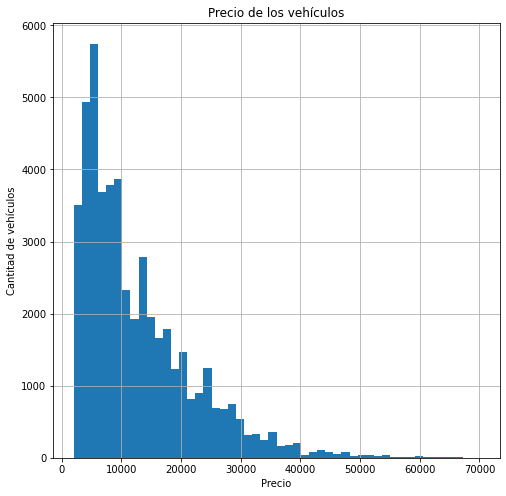

In [56]:
# Se crea histograma para precio 
data.hist("price", bins=50, range= (2000, 70000), figsize=(8,8))
plt.title("Precio de los vehículos")
plt.ylabel("Cantitad de vehículos")
plt.xlabel("Precio")
plt.show()

En el histograma se aprecia que se encuentra valores atípicos de precio en 0 y en valores mayores a los 40,000.

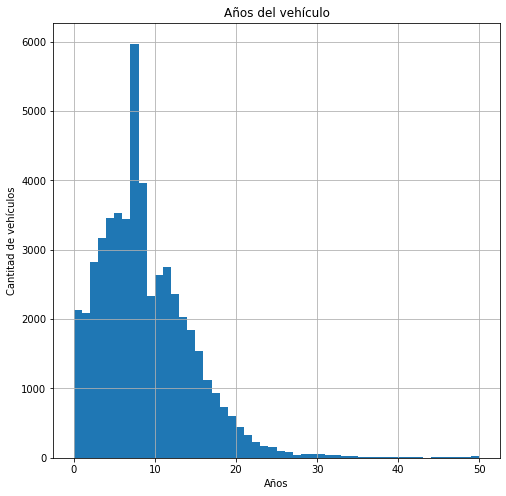

In [57]:
#Se crea histograma los años del vehiculo cuando el anuncio se colocó
data.hist("car_year", bins=50,range=(0, 50), figsize=(8,8))
plt.title("Años del vehículo")
plt.ylabel("Cantitad de vehículos")
plt.xlabel("Años")
plt.show()

Se observan carros nuevos con 0 años y se pueden observar carros con más de 15 años de antigüedad. Aqui los valores atipicos serian los carros con menos de 1 años y más de 20 años.

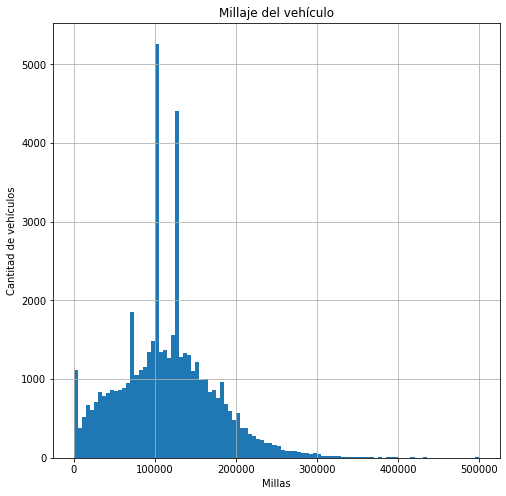

In [58]:
#Se crea histograma para millaje
data.hist("odometer", bins=100, range= (0, 500000), figsize=(8,8))
plt.title("Millaje del vehículo")
plt.ylabel("Cantitad de vehículos")
plt.xlabel("Millas")
plt.show()

Parecen haber valores atípicos en 0 y mayores a 300,000 millas.

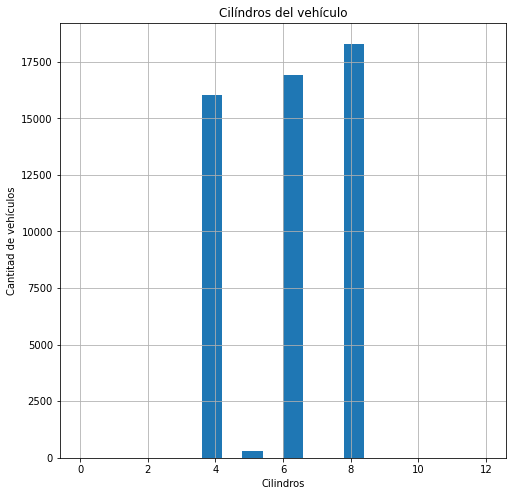

In [59]:
#Se crea histograma para número de cilindros
data.hist("cylinders", bins=20, range= (0, 12), figsize=(8,8))
plt.title("Cilíndros del vehículo")
plt.ylabel("Cantitad de vehículos")
plt.xlabel("Cilindros")
plt.show()

Se pueden visualizar valores atípicos en los cilindros menores a 4 y mayores a 8.

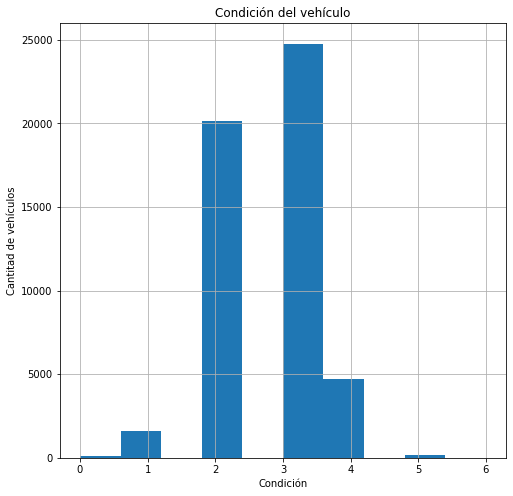

In [60]:
#Se crea histograma de la columna condition
data.hist("condition", bins=10, range= (0, 6), figsize=(8,8))
plt.title("Condición del vehículo")
plt.ylabel("Cantitad de vehículos")
plt.xlabel("Condición")
plt.show()

Se encuentra valores atípicos menores a 2 y mayores a 4.

## Estudiar y tratar valores atípicos

[Con los resultados anteriores, determina qué columnas pueden contener valores atípicos y crea un DataFrame sin esos valores atípicos. Pista: los valores atípicos se pueden identificar tras definir el límite inferior/superior para el rango normal de valores.]

In [61]:
# Determina los límites inferiores para valores atípicos
display(data[["price","car_year", "odometer", "cylinders", "condition"]].describe())

,price,car_year,odometer,cylinders,condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,8.469229,115199.007278,6.082290,2.637535
std,10040.803015,6.079773,60484.868232,1.632278,0.712447
min,1.000000,0.000000,0.000000,4.000000,0.000000
25%,5000.000000,4.000000,75668.000000,4.000000,2.000000
50%,9000.000000,7.000000,110908.000000,6.000000,3.000000
75%,16839.000000,12.000000,147821.000000,8.000000,3.000000
max,375000.000000,110.000000,990000.000000,8.000000,5.000000


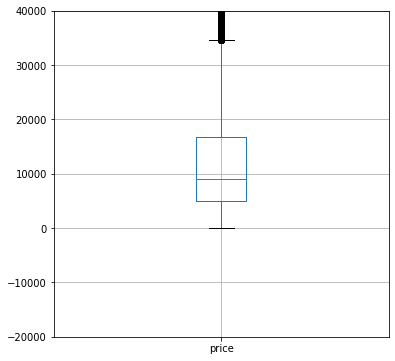

Valor mínimo para price: -12758.5


In [62]:
data.plot(y="price", figsize=(6,6), kind="box", grid=True)
plt.ylim(-20000, 40000)
plt.show()
q1 = data["price"].quantile(0.25)
q3 = data["price"].quantile(0.75)
iqr = q3 - q1
lim_inf_pri = q1 - 1.5 * iqr 
print("Valor mínimo para price:", lim_inf_pri)

En el diagrama de caja, se puede apreciar que el valor teórico para el bigote inferior es de -12,758.5 de precio. Debido a que no hay valores ahí. Se tomará como límite inferior el primer quartil, 5000.

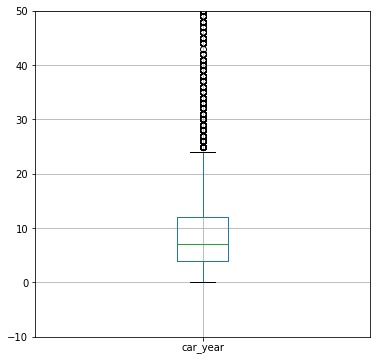

Valor mínimo para car_year: -8.0


In [63]:
data.plot(y="car_year", figsize=(6,6), kind="box", grid=True)
plt.ylim(-10, 50)
plt.show()
q1 = data["car_year"].quantile(0.25)
q3 = data["car_year"].quantile(0.75)
iqr = q3 - q1
lim_inf_year = q1 - 1.5 * iqr 
print("Valor mínimo para car_year:", lim_inf_year)

En el diagrama de caja, se puede apreciar que el valor teórico para el bigote inferior es de -8 de años del carro. Debido a que no hay valores ahí. Se tomará como límite inferior el valor mínimo de años 0.

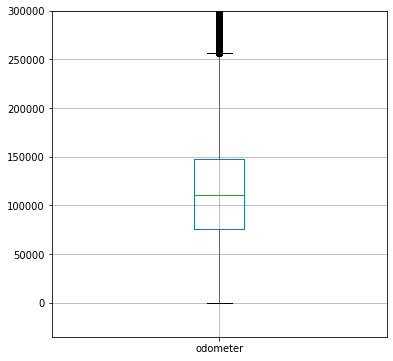

Valor mínimo para odometer: -32561.5


In [64]:
data.plot(y="odometer", figsize=(6,6), kind="box", grid=True)
plt.ylim(-35000, 300000)
plt.show()
q1 = data["odometer"].quantile(0.25)
q3 = data["odometer"].quantile(0.75)
iqr = q3 - q1
lim_inf_odo = q1 - 1.5 * iqr 
print("Valor mínimo para odometer:", lim_inf_odo)

En el diagrama de caja, se puede apreciar que el valor teórico para el bigote inferior es de -32,561.5 de millas del carro. Debido a que no hay valores ahí. Se tomará como límite inferior el valor mínimo de millas 0.

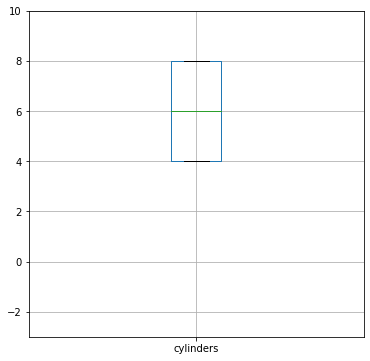

Valor mínimo para cylinders: -2.0


In [65]:
data.plot(y="cylinders", figsize=(6,6), kind="box", grid=True)
plt.ylim(-3, 10)
plt.show()
q1 = data["cylinders"].quantile(0.25)
q3 = data["cylinders"].quantile(0.75)
iqr = q3 - q1
lim_inf_cyl = q1 - 1.5 * iqr 
print("Valor mínimo para cylinders:", lim_inf_cyl)

En el diagrama de caja, se puede apreciar que el valor teórico para el bigote inferior es de -2 de cilindros del carro. Debido a que no hay valores ahí. Se tomará como límite inferior el valor mínimo de cilindros 4.

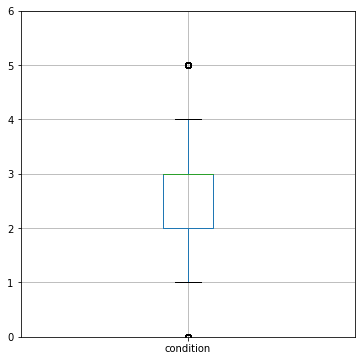

Valor mínimo para condition: 0.5


In [66]:
data.plot(y="condition", figsize=(6,6), kind="box", grid=True)
plt.ylim(0, 6)
plt.show()
q1 = data["condition"].quantile(0.25)
q3 = data["condition"].quantile(0.75)
iqr = q3 - q1
lim_inf_con = q1 - 1.5 * iqr 
print("Valor mínimo para condition:", lim_inf_con)

En el diagrama de caja, se puede apreciar que el valor teórico para el bigote inferior es de 0.5 de cilindros del carro.

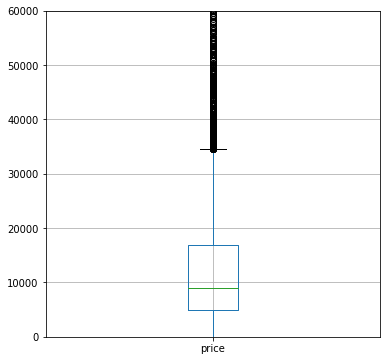

Valor máximo para price: 34597.5


In [67]:
# Determinar los límites superiores para valores atípicos
data.plot(y="price", figsize=(6,6), kind="box", grid=True)
plt.ylim(0, 60000)
plt.show()
q1 = data["price"].quantile(0.25)
q3 = data["price"].quantile(0.75)
iqr = q3 - q1
lim_sup_pri = q3 + 1.5 * iqr 
print("Valor máximo para price:", lim_sup_pri)

En el diagrama de caja, se puede apreciar que el valor teórico para el bigote superior es de 34,597.5 del precio del carro. 

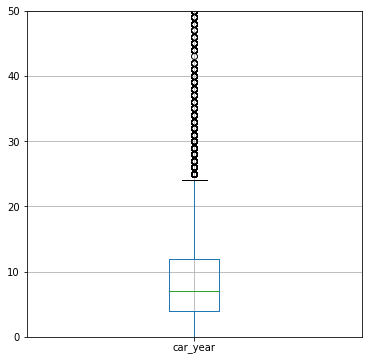

Valor máximo para car_year: 24.0


In [68]:
data.plot(y="car_year", figsize=(6,6), kind="box", grid=True)
plt.ylim(0, 50)
plt.show()
q1 = data["car_year"].quantile(0.25)
q3 = data["car_year"].quantile(0.75)
iqr = q3 - q1
lim_sup_year = q3 + 1.5 * iqr 
print("Valor máximo para car_year:", lim_sup_year)

En el diagrama de caja, se puede apreciar que el valor teórico para el bigote superior es de 24 de los años del carro. 

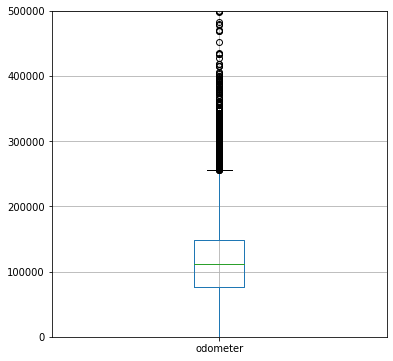

Valor máximo para odometer: 256050.5


In [69]:
data.plot(y="odometer", figsize=(6,6), kind="box", grid=True)
plt.ylim(0, 500000)
plt.show()
q1 = data["odometer"].quantile(0.25)
q3 = data["odometer"].quantile(0.75)
iqr = q3 - q1
lim_sup_odo = q3 + 1.5 * iqr 
print("Valor máximo para odometer:", lim_sup_odo)

En el diagrama de caja, se puede apreciar que el valor teórico para el bigote superior es de 256,050.5 del millaje del carro. 

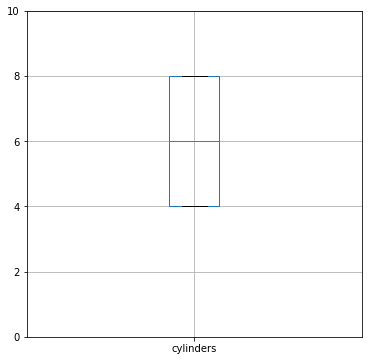

Valor máximo para cylinders: 14.0


In [70]:
data.plot(y="cylinders", figsize=(6,6), kind="box", grid=True)
plt.ylim(0, 10)
plt.show()
q1 = data["cylinders"].quantile(0.25)
q3 = data["cylinders"].quantile(0.75)
iqr = q3 - q1
lim_sup_cyl = q3 + 1.5 * iqr 
print("Valor máximo para cylinders:", lim_sup_cyl)

En el diagrama de caja, se puede apreciar que el valor teórico para el bigote superior es de 14 del cilindraje del carro. 

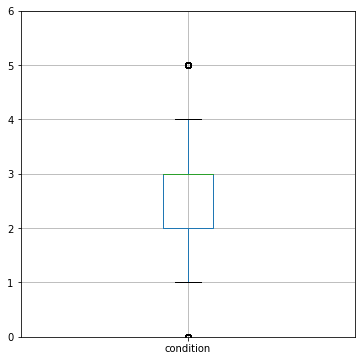

Valor máximo para cylinders: 4.5


In [71]:
data.plot(y="condition", figsize=(6,6), kind="box", grid=True)
plt.ylim(0, 6)
plt.show()
q1 = data["condition"].quantile(0.25)
q3 = data["condition"].quantile(0.75)
iqr = q3 - q1
lim_sup_con = q3 + 1.5 * iqr 
print("Valor máximo para cylinders:", lim_sup_con)

En el diagrama de caja, se puede apreciar que el valor teórico para el bigote superior es de 4.5 de la condición del carro. 

In [72]:
# Almacena los datos sin valores atípicos en un DataFrame separado
data_filtered = data.query('price >= 5000 and car_year >= 0 and odometer >= 0 and cylinders >= 4 and condition >= @lim_inf_con') #limite inferior
data_filtered = data_filtered.query('price <= @lim_sup_pri and car_year <= @lim_sup_year and odometer <= @lim_sup_odo and cylinders <= @lim_sup_cyl and condition <= @lim_sup_con')#límite superior
print("Porcentaje de los datos filtrados: ", round((1 - len(data_filtered) / len(data))*100), "%")

Porcentaje de los datos filtrados:  30 %


## Estudiar parámetros principales sin valores atípicos

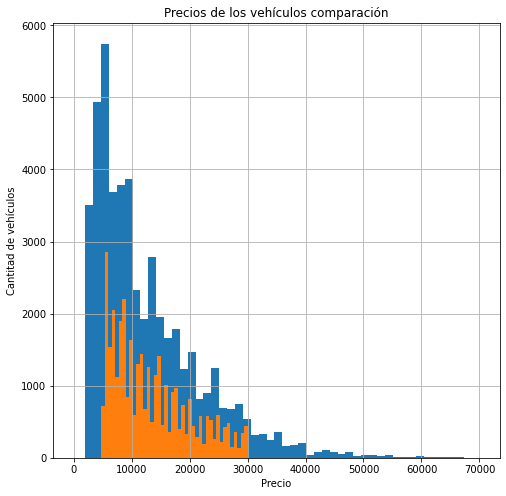

In [73]:
data["price"].hist(bins=50, range= (2000, 70000), figsize=(8,8))
data_filtered["price"].hist(bins=50, range= (0, 30000), figsize=(8,8))
plt.title("Precios de los vehículos comparación")
plt.ylabel("Cantitad de vehículos")
plt.xlabel("Precio")
plt.show()

En el histograma del dataset filtrado se puede visualizar, que no se encuentran valores atípicos de precios menores a 5000 y mayores a 30,000. 

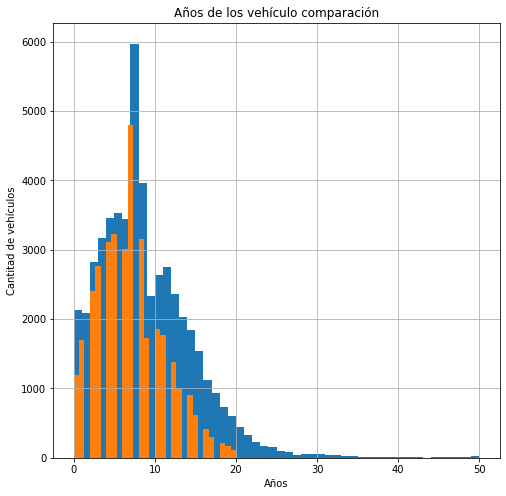

In [74]:
data["car_year"].hist(bins=50,range=(0, 50), figsize=(8,8))
data_filtered["car_year"].hist(bins=30, range= (0, 20), figsize=(8,8))
plt.title("Años de los vehículo comparación")
plt.ylabel("Cantitad de vehículos")
plt.xlabel("Años")
plt.show()

En el histograma del dataset filtrado se puede visualizar, que no se encuentran valores atípicos de antiguedad de los carros de 0 a 20 años. 

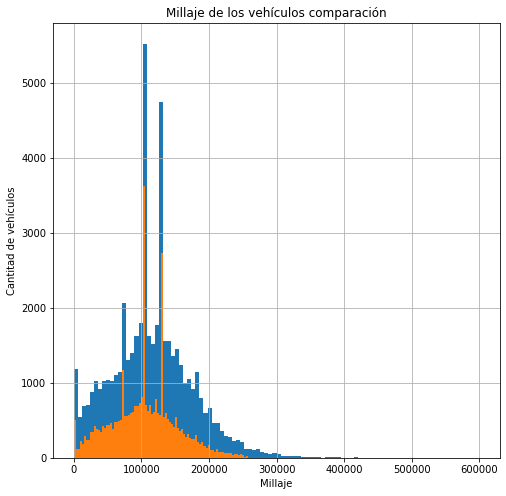

In [75]:
data["odometer"].hist(bins=100, range= (0, 600000), figsize=(8,8))
data_filtered["odometer"].hist(bins=100, range= (0, 300000), figsize=(8,8))
plt.title("Millaje de los vehículos comparación")
plt.ylabel("Cantitad de vehículos")
plt.xlabel("Millaje")
plt.show()

En el histograma del dataset filtrado se puede visualizar, que no se encuentran valores atípicos de las millas recorridas por los carros de 0 a 250,000. 

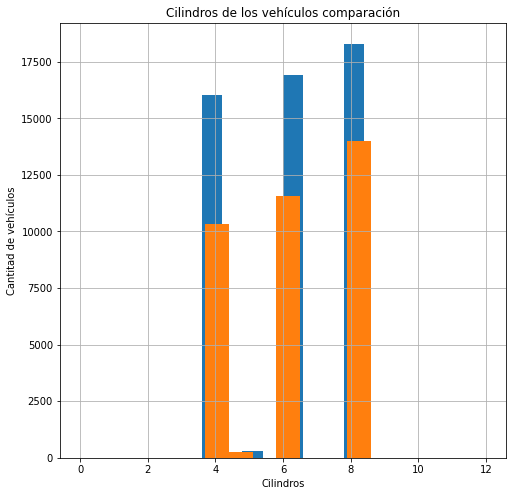

In [76]:
data["cylinders"].hist(bins=20, range= (0, 12), figsize=(8,8))
data_filtered["cylinders"].hist(bins=10, range= (3, 10), figsize=(8,8))
plt.title("Cilindros de los vehículos comparación")
plt.ylabel("Cantitad de vehículos")
plt.xlabel("Cilindros")
plt.show()

En el histograma del dataset filtrado se puede visualizar, que no se encuentran valores atípicos de cilindros menores a 4 y mayores 8. 

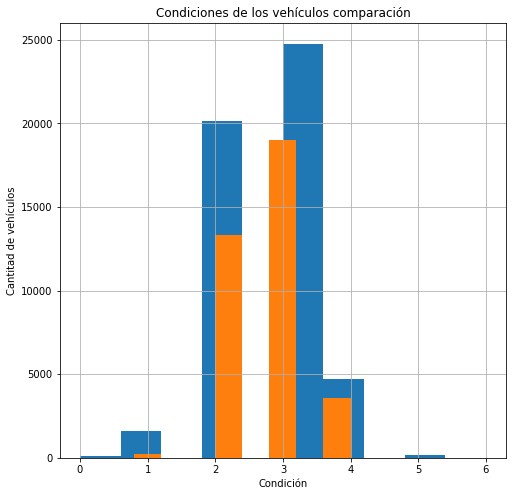

In [77]:
data["condition"].hist(bins=10, range= (0, 6), figsize=(8,8))
data_filtered["condition"].hist(bins=10, range= (0, 4), figsize=(8,8))
plt.title("Condiciones de los vehículos comparación")
plt.ylabel("Cantitad de vehículos")
plt.xlabel("Condición")
plt.show()

En el histograma del dataset filtrado se puede visualizar, que no se encuentran valores atípicos de condición menores a 1.5 y mayores 4.5. 

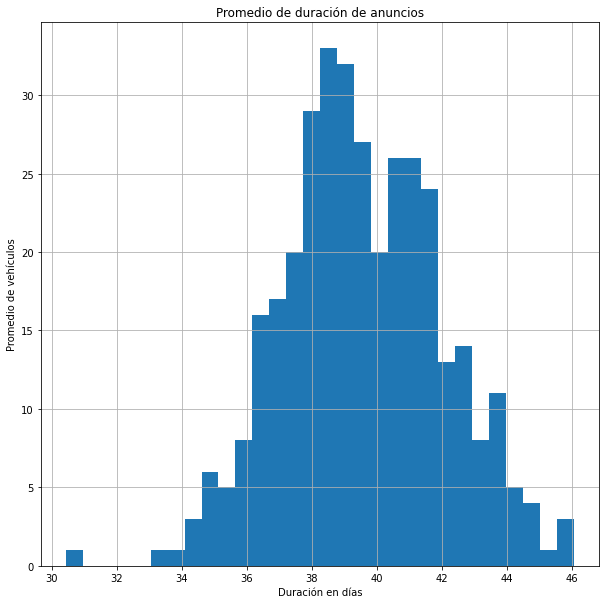

In [78]:
data.pivot_table(index="date_posted", values="days_listed").hist(bins=30, figsize=(10, 10))
plt.title("Promedio de duración de anuncios")
plt.ylabel("Promedio de vehículos")
plt.xlabel("Duración en días")
plt.show()

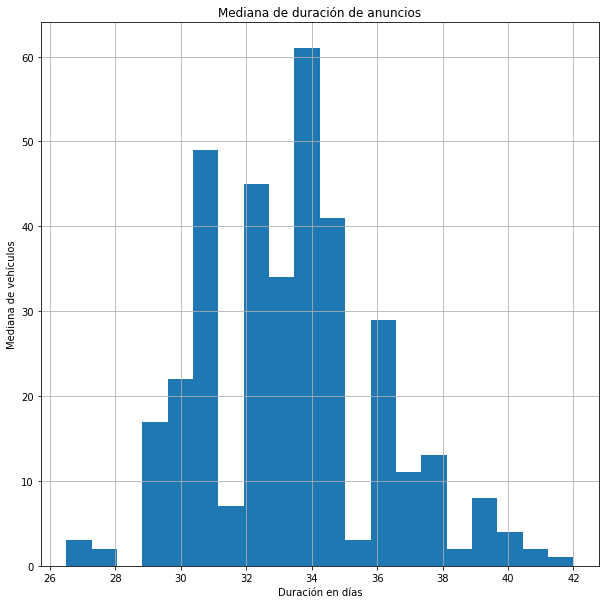

In [79]:
data.pivot_table(index="date_posted", values="days_listed", aggfunc="median").hist(bins=20, figsize=(10, 10))
plt.title("Mediana de duración de anuncios")
plt.ylabel("Mediana de vehículos")
plt.xlabel("Duración en días")
plt.show()

Se puede visualizar en ambos grágicos una distribución normal, se tomará en cuenta la distribución normal de la media, debido a que se ve más uniforme. El anuncio el anuncio que se eliminó más rapido tardó 31 días y el más tardado 47. Se puede visualizar que la mayoría de los anuncios tardan 39 días en ser removidos. 

## Precio promedio por cada tipo de vehículo

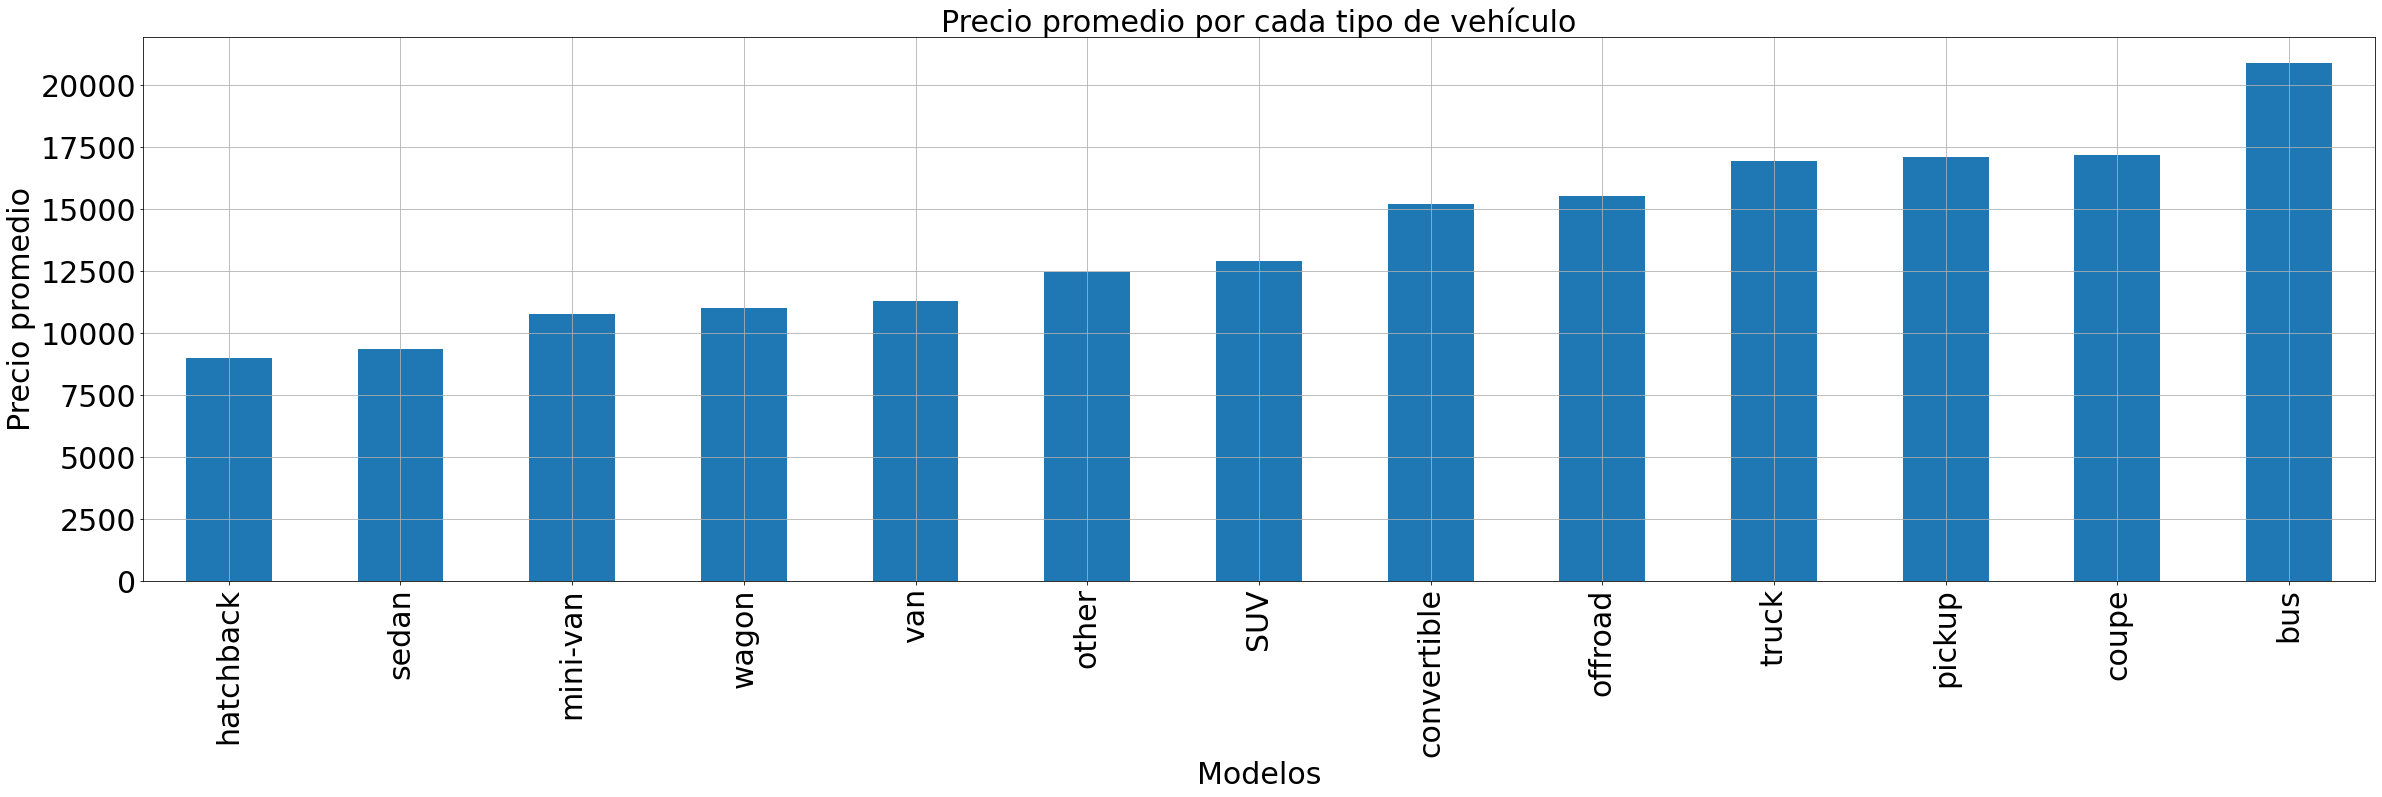

In [80]:
data_filtered.pivot_table(index="type",values="price")["price"].sort_values(ascending=True).plot(kind="bar",figsize=(40,10), fontsize=30, grid=True)
plt.title("Precio promedio por cada tipo de vehículo", fontsize=30)
plt.ylabel("Precio promedio", fontsize=30)
plt.xlabel("Modelos", fontsize=30)
plt.show()

Se puede visualizar el promedio de precio por tipo de vehículo. La media más alta es el bus y el más bajo es hatchback.

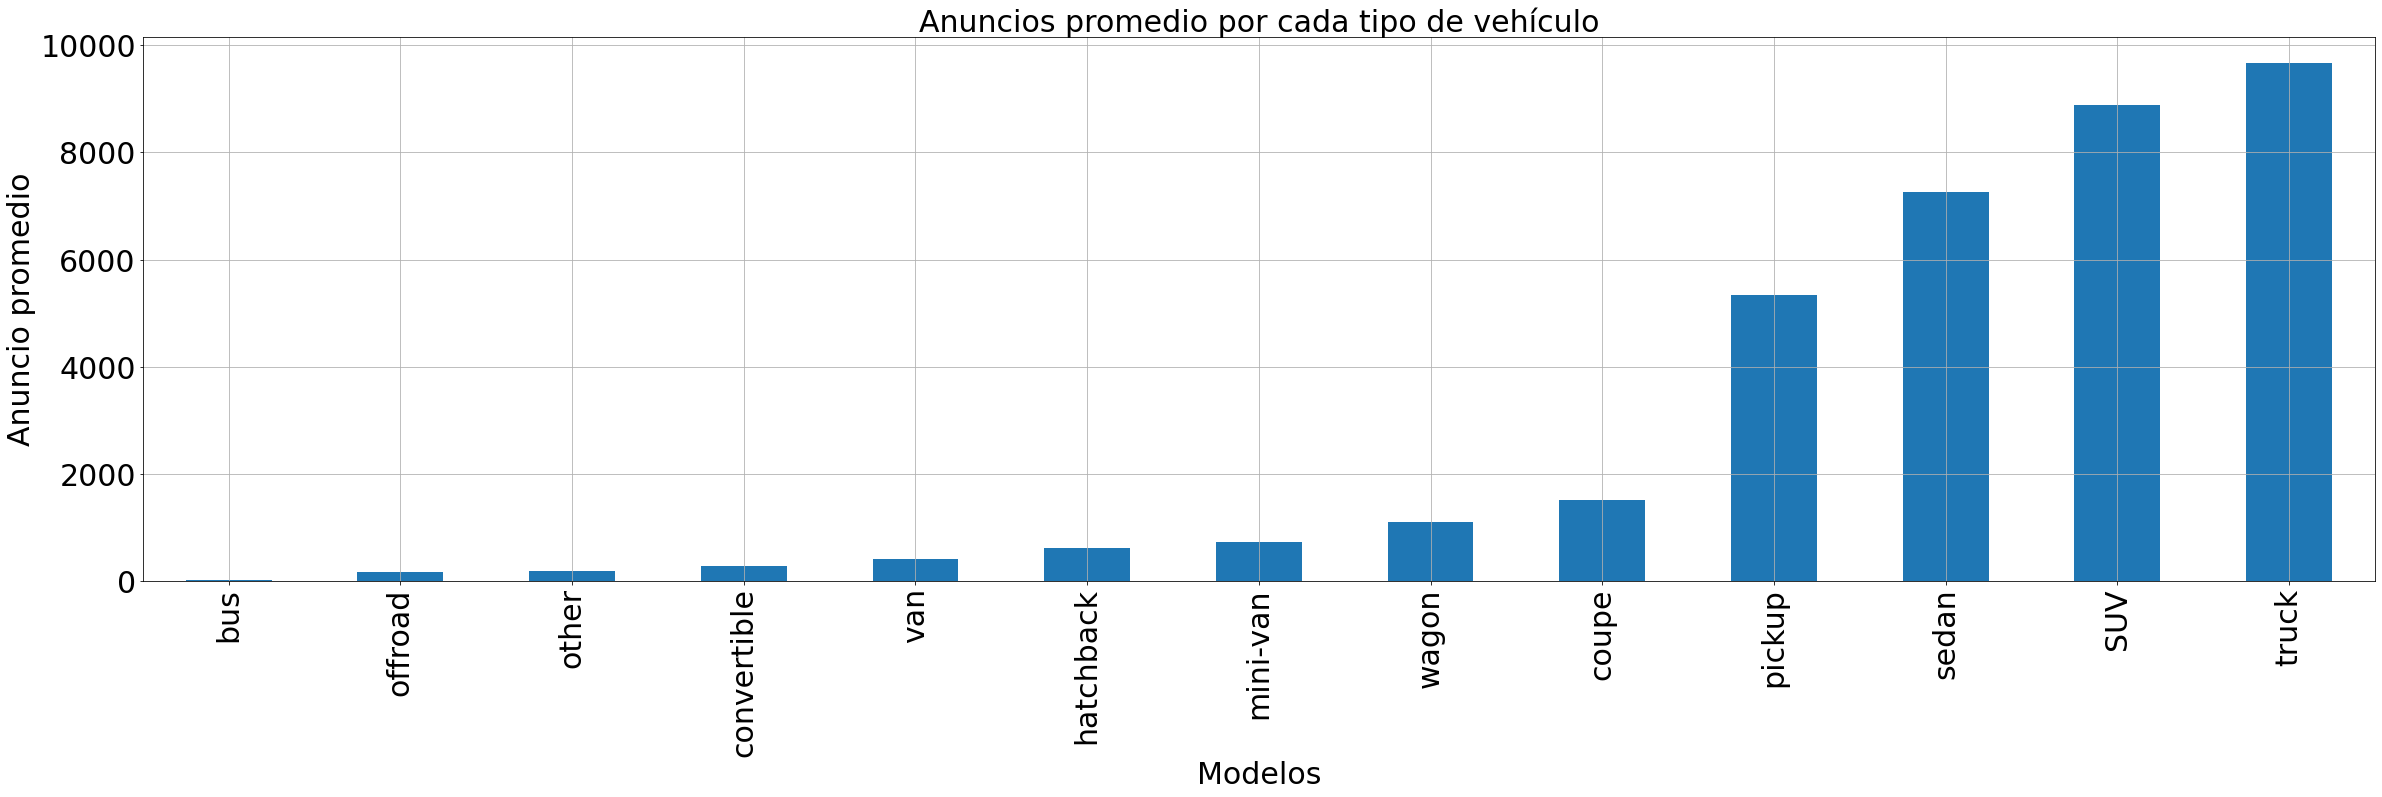

In [81]:
data_filtered["type"].value_counts(ascending=True).plot(kind="bar", figsize=(40,10), fontsize=30, grid=True)
plt.title("Anuncios promedio por cada tipo de vehículo", fontsize=30)
plt.ylabel("Anuncio promedio", fontsize=30)
plt.xlabel("Modelos", fontsize=30)
plt.show()

Se visualiza la cantidad de anuncios por vehículo. Los dos tipos de vehículos con mayor cantidad de anuncios son SUV y truck.

## Factores de precio

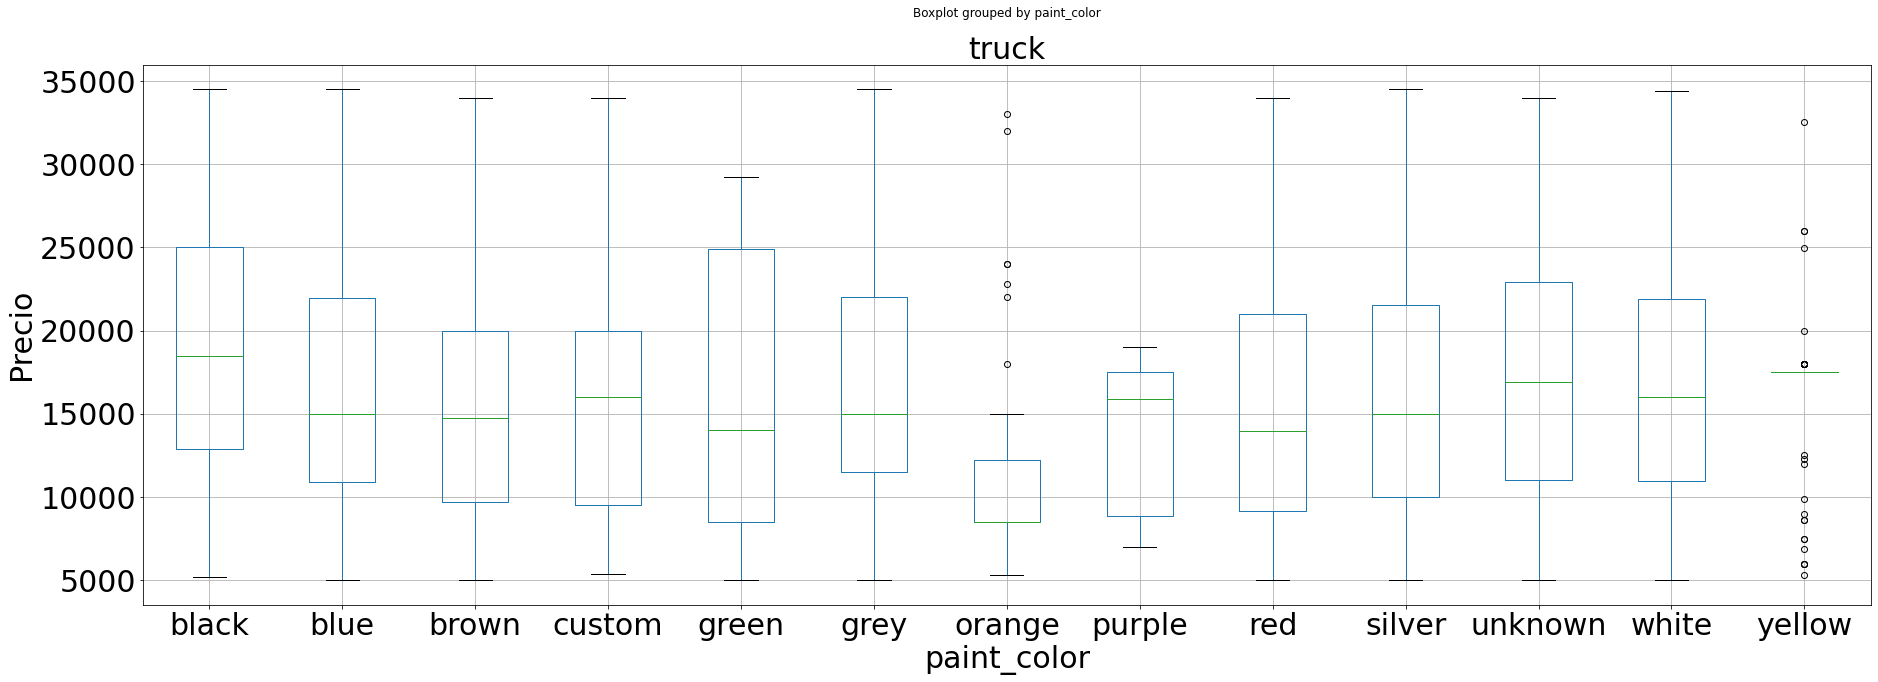

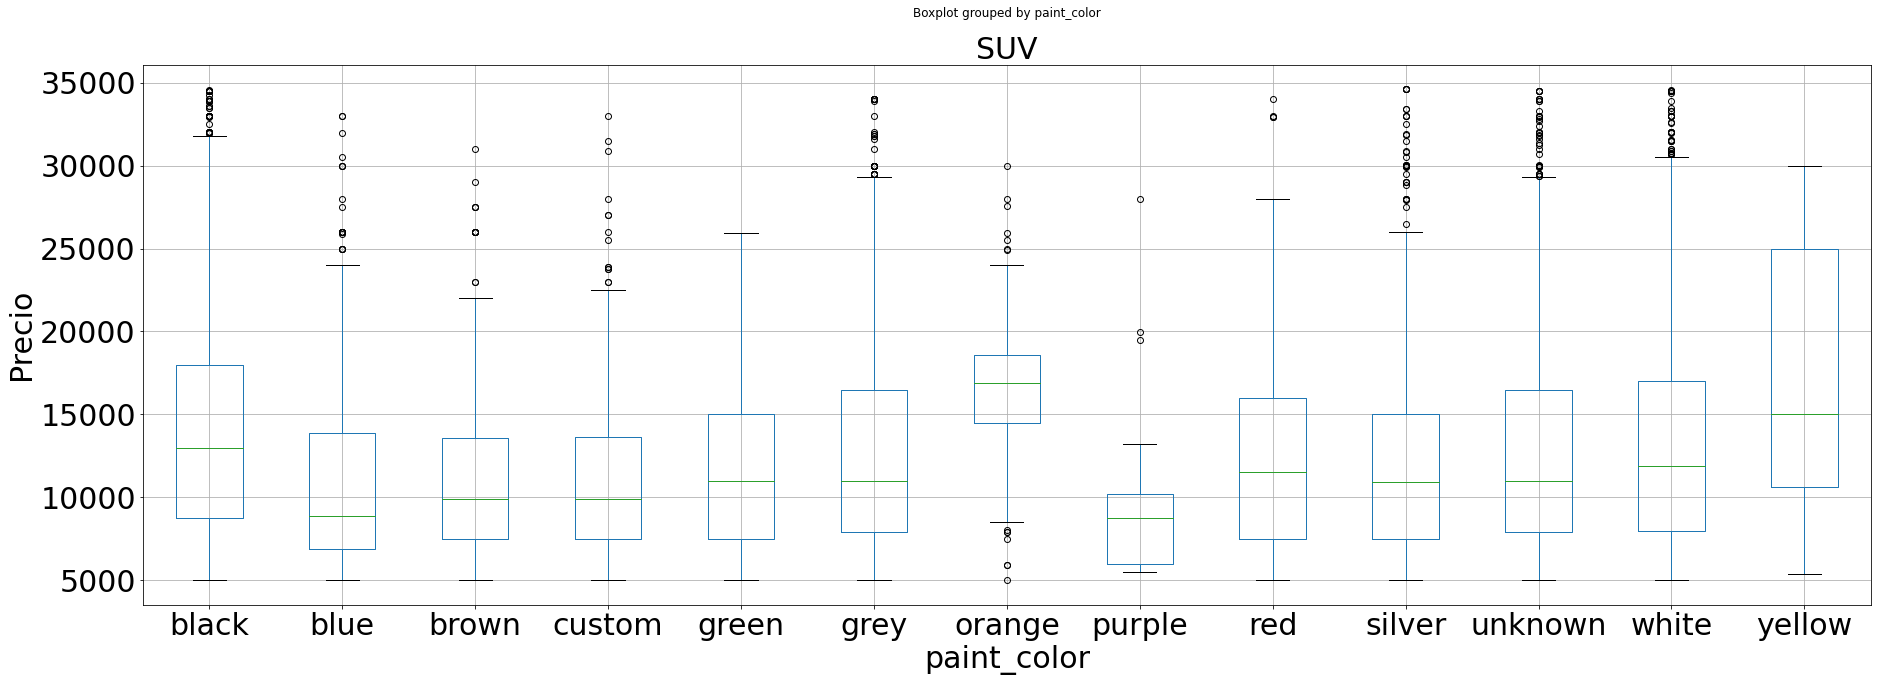

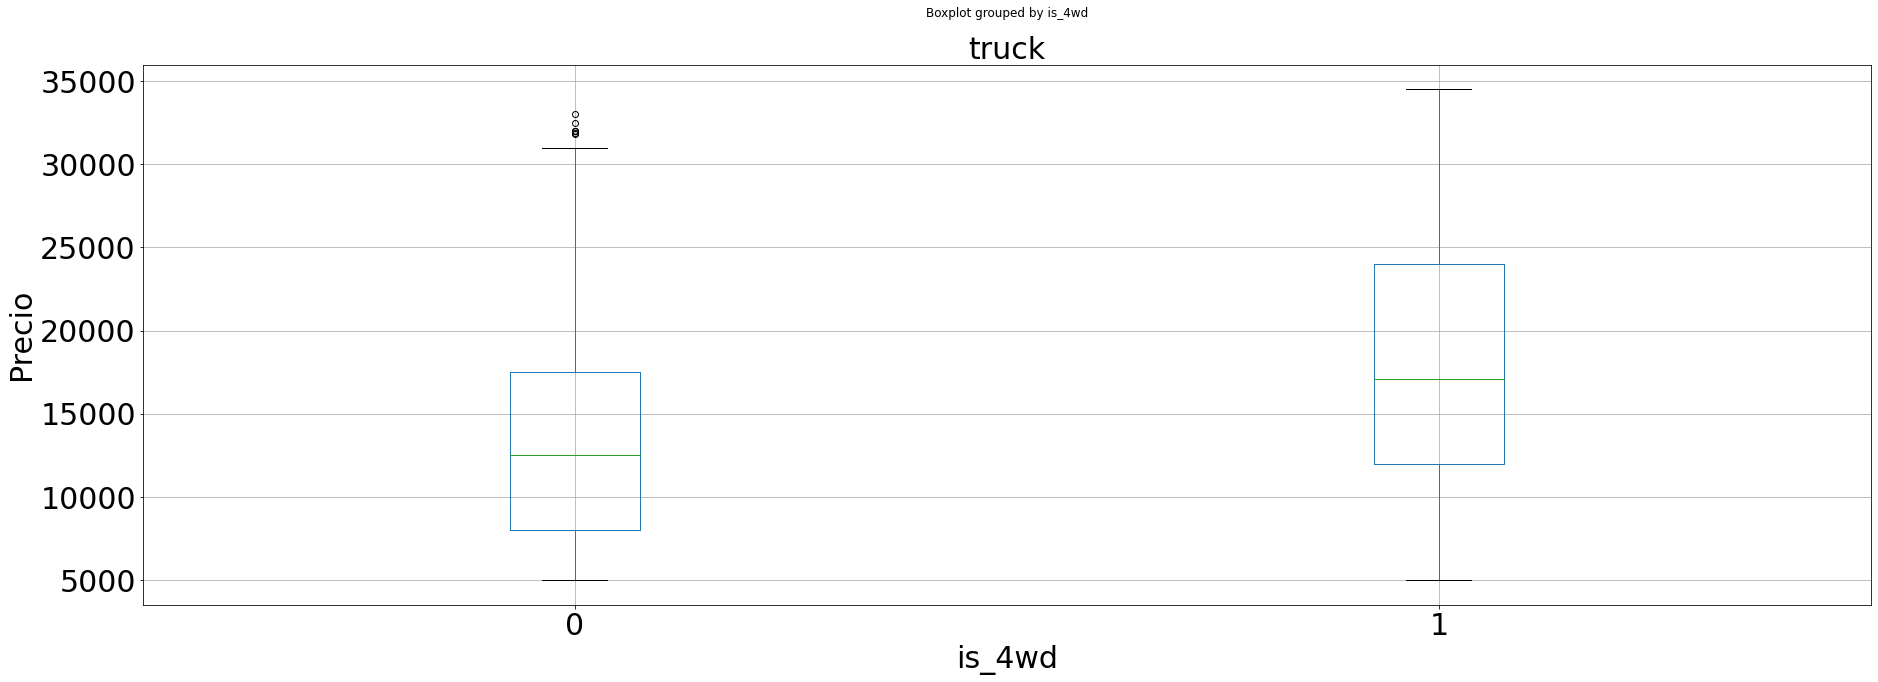

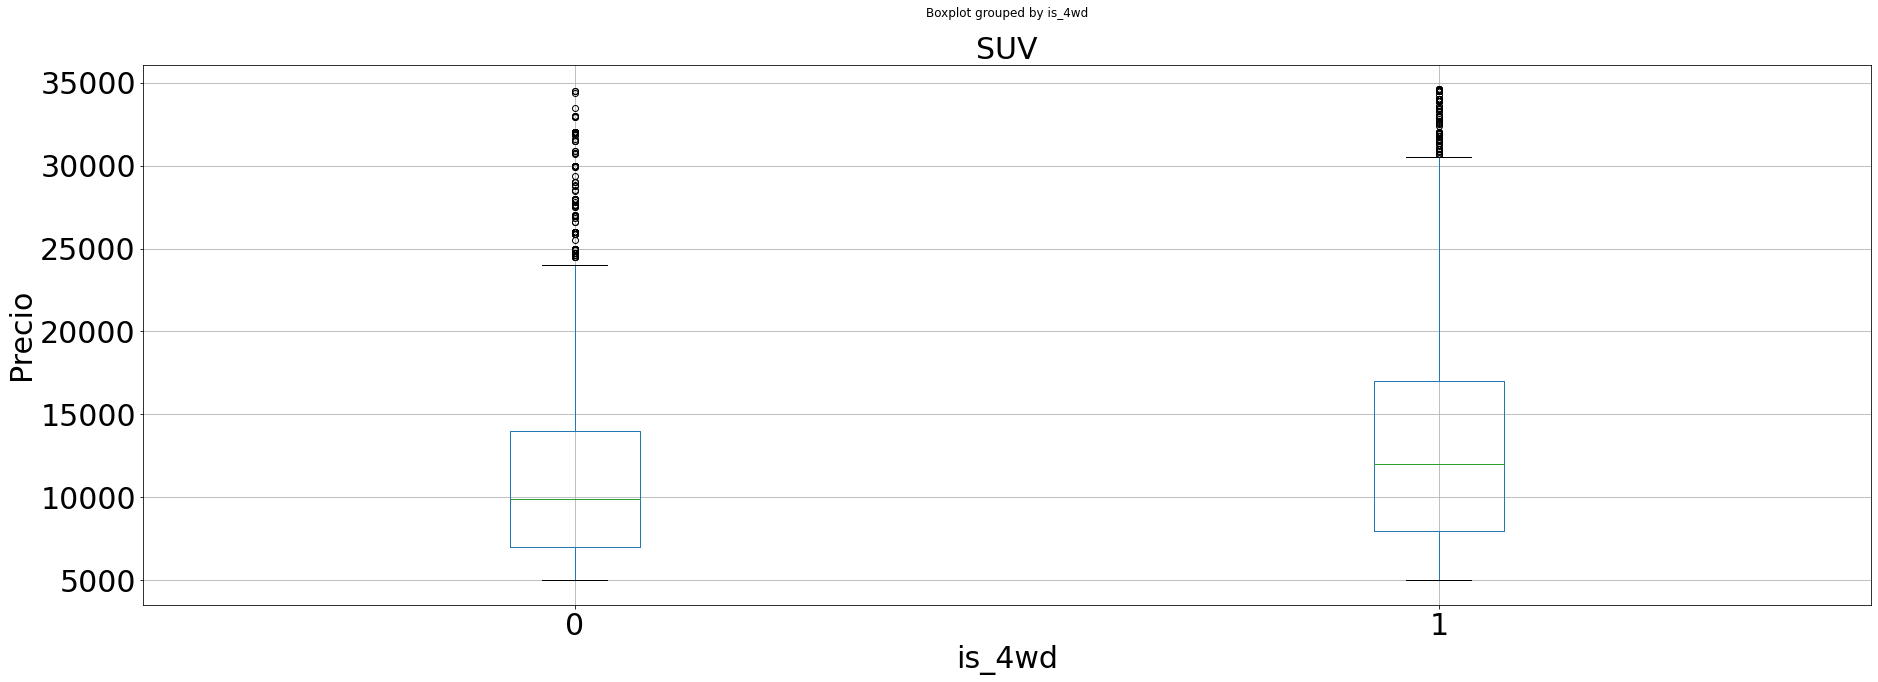

In [82]:
category = ["paint_color", "is_4wd"]
model = ["truck", "SUV" ]

for box in category :
    for car in model:
        data_filtered.query('type == @car').boxplot(column="price", by=box, figsize=(30,10), fontsize=30)
        plt.title(car, fontsize=30)
        plt.ylabel("Precio", fontsize=30)
        plt.xlabel(box, fontsize=30)
        plt.show() 

En los carros tipo truck la mediana de precio más alta esta en el color negro y la más baja es naranja.
En el caso de los carros SUV la mediana más alta esta en color naranja y la más baja en morado. 
En el caso de la tracción, la mediana más alta es la tracción de las 4 ruedas para ambos vehículos.

,price,car_year,odometer,cylinders,condition,days_listed
price,1.000000,-0.412626,-0.393550,0.347953,0.221518,-0.000682
car_year,-0.412626,1.000000,0.430257,0.119512,-0.270515,0.006403
odometer,-0.393550,0.430257,1.000000,0.090632,-0.322576,0.003347
cylinders,0.347953,0.119512,0.090632,1.000000,-0.065192,0.001225
condition,0.221518,-0.270515,-0.322576,-0.065192,1.000000,-0.002404
days_listed,-0.000682,0.006403,0.003347,0.001225,-0.002404,1.000000


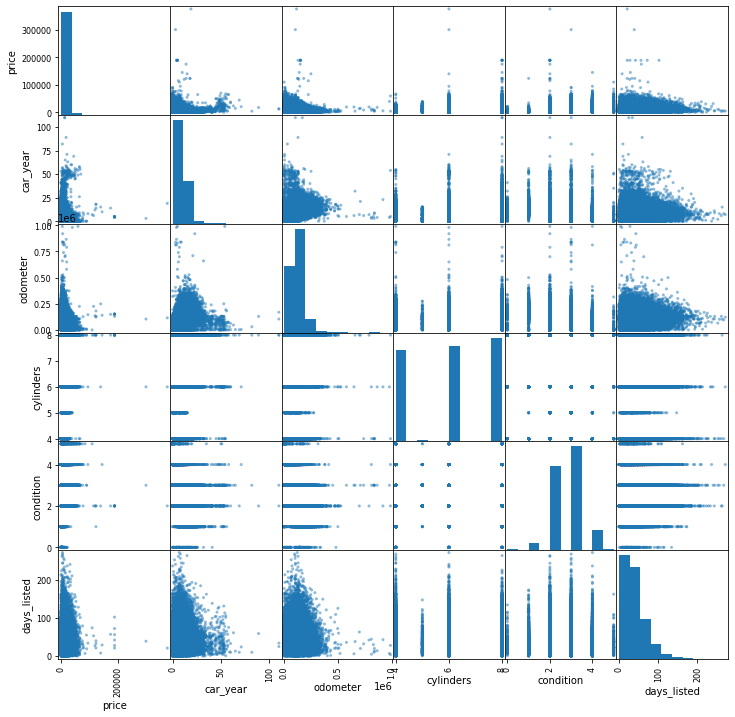

In [83]:
data_filtered_numeric = data.loc[:,["price", "model","car_year", "odometer", "cylinders", "condition","days_listed" ]]
display(data_filtered_numeric.corr())
pd.plotting.scatter_matrix(data_filtered_numeric, figsize=(12, 12))
plt.show()

En la matriz de correlación de las variables númericas se puede observar lo siguiente:
1. Los años del del vehículo influye de manera inversamente proporcional al precio del mismo.
2. El millaje del vehículo influye de manera inversamente proporcional al precio del mismo.
3. Los cilindros del vehículo influyen de manera proporcional al precio del mismo.
4. La condición del vehículo influye poco de manera proporcional al precio del vehículo.
5. Basicamente no hay relación entre los días anunciado con el precio, millaje, cilindraje y condición del vehículo.

## Conclusión general
Despues de un basto analisis de los datos limpios y filtrados se realizaron las siguientes conclusiones:
1. Los tipos de vehículos que se venden a mejor precio son los bus, mientras que los hatchback son de menor precio.
2. Los tipos de vehículos más anunciados son el Truck y SUV
3. El colo con la mediana de precio más alta es el negro.
2. Los vehículos con traccion en las 4 ruedas se venden a mayor precio.
4. Los vehículos con mayor edad y kilometraje se venden a menor precio.
5. Los cilindros y las condiciones del vehículo le dan una plusvalia al valor del vehículo.
6. El tiempo promedio de una anuncio desde que su publicación es de 39 días

Se pudo observar que no hay relación del tiempo en que estuvo publicado el anuncio del vehículo con ninguna de sus carácterísticas, incluso el precio. 
Se puede englobar la plusvalia de un carro en el tipo de carro, la edad del vehículo, el millaje y el cilindraje. Las condiciones y el color no parecen ser determinantes.